# Design, concept and implementation of smart interactive scripts in scientific basic classes

[Peter Kersten](https://www.hshl.de/personen/prof-dr-ing-peter-kersten), Hamm-Lippstadt University of Applied Sciences   
[Katrin Temmen](https://www.uni-paderborn.de/person/30086/), University of Paderborn, College of Electrical Engineering


EDUCON 2020 – IEEE Global Engineering Education Conference   
Workshop W2A 
Porto, Portugal

27th April 2020

# Table of content
- Introduction and motivation
- Design, technology and implementation of the interactive scripts
- Pedagogy of the scripts in physics and electrical engineering classes
- Hands-on experience using typical examples
- Feedback session 
- Summary and conclusion

# Hands-on experience using typical examples*
- Numerical calculations
- Visualisation of parametric curves
- Interactive plots
- Visualisation of functions with two variables
- Symbolic computation
- Visualisation of vector fields   


_*Examples were taken from an educational book, see: references_

In [1]:
%matplotlib inline
import numpy as np
import sympy as sp
import math as m
import matplotlib.pyplot as plt
import ipywidgets as widgets

from ipywidgets import interact
from sympy import symbols
from sympy.plotting import plot3d
from matplotlib.pyplot import figure

## Performing numerical calculations

**Example: Free fall with friction**   

We want to study the movement of a skydiver in the first $20\,\text{s}$ after the jump and and visualize it in an $v$-$t$-diagramm. We consider a mass of the skydiver of $m=65\,\text{kg}$, a coefficient of friction of $b=0,251\,\text{kg}\cdot\text{m}^{-1}$ and an initial velocity of $v_0=0$. The acceleration $a$ of the skydiver can be calculated by:

$|a|=g-\frac{b}{m}\cdot |v|^2$ 

where $g$ is the magnitude of the free-fall acceleration and $v$ is the velocity.

We want to apply a numerical integration using the forward Euler method to solve the ordinary differential equation with a the given initial value $v_0=0$.


**Give it a try**
- Change the value of the mass from $m=65\,\text{kg}$ to $m=80\,\text{kg}$ (variable `m`) by moving the slider and analyse the terminal velocity.
- Vary the number of steps (variable `n`) by moving the slider and analyse the resulting accuracy.


In [2]:
g = 9.81
b = 0.251
tspan = 20

def f(n,m):
    dt = tspan/(n-1)
    t = np.zeros(n)
    v = np.zeros(n)
    a = np.zeros(n)
    for i in range (0,n-1):
        a[0] = g
        t[i+1] = t[i] + dt
        v[i+1] = v[i] + a[i]*dt
        a[i+1] = g - b/m*v[i+1]**2
    
    plt.plot(t,v,'b',lw=2)
    plt.xlim(0, tspan)
    plt.ylim(0, 60)
    plt.xlabel('time in s')
    plt.ylabel('speed in m/s')
    plt.title('v-t-diagramm of the skydiver')
    plt.grid()
    
    
interact(f, n = widgets.IntSlider(value=10, min=5, max=20, step=1), 
            m = widgets.IntSlider(value=65, min=50, max=80, step=10))

interactive(children=(IntSlider(value=10, description='n', max=20, min=5), IntSlider(value=65, description='m'…

<function __main__.f(n, m)>

## Visualisation of parametric curves

**Example: Visualisation of parametric curves**   

Visualize the path of a projectile (trajectory) with a given velocity at different launch angles in a parametric diagramm. We consider an initial velocity of $v_0=25\,\text{m/s}$. The motion in $x$- and $y$-direction is described by:

$x(t)=x_0+v_{0,x}\,t$   
$y(t)=y_0+v_{0,y}\,t-\frac{1}{2}\,g\,t^2$

where $v_{0,x}$ is the initial horizontal velocity component, $v_{0,y}$ is the vertical velocity component, $t$ is the time and $g$ is the magnitude of the free-fall acceleration. The velocity compontens $v_{0,x}$ and $v_{0,y}$ can be calculated by:

$v_{0,x}=|v_0|\,\text{cos}\,\theta$   
$v_{0,y}=|v_0|\,\text{sin}\,\theta$ 

where $\theta$ is the launch angle. We want to consider different values for the initial heigth $y_0$ at a fixed position $x_0=0$.


**Give it a try**

- Vary the launch angle (variable `theta`) at an initial height of $y_0=0$ by moving the slider, when can we achieve a maximum range?
- What is the optimum launch angle at the initial heigth $y_0=10\,\text{m}$ (variable `y0`) in order to achive a maximum range?

In [3]:
g = 9.81
t1 = np.arange (0,15,0.1)

def f(theta,v,y0):
    vx = v*np.cos(np.deg2rad(theta))
    vy = v*np.sin(np.deg2rad(theta))
    x = vx*t1
    y = y0+(vy*t1)-1/2*g*t1**2
    plt.plot(x,y,'b',lw=2)
    plt.ylim(0, 40)
    plt.xlim(0, 80)
    plt.grid()
    plt.xlabel('x in m')
    plt.ylabel('y in m')
    plt.title('path of the projectile')

interact(f, theta = widgets.IntSlider(value=30, min=0, max=90, step=1), 
            v = widgets.IntSlider(value=25, min=10, max=30, step=1),
            y0 = widgets.IntSlider(value=0, min=0, max=10, step=2))    

interactive(children=(IntSlider(value=30, description='theta', max=90), IntSlider(value=25, description='v', m…

<function __main__.f(theta, v, y0)>

## Interactive plots

**Example: Discharge curve of a capacitor**   

We want to study the discharge of a capacitor. We consider a capacitor with $C=4,0\,\mu \text{F}$ and an initial voltage of $U_0=24\,\text{V}$. The discharge current $I(t)$ is given by:

$ I(t) = \frac{U_0}{R}\cdot e^{-t/(R\cdot C)\,\,\,}$  

where $ R $ is the resistivity, $C$ is the capacity and $t$ is the time.


**Give it a try**

- Vary the resistivity (variable `R`) by moving the slider and analyse the discharge at a capacity of $C=4,0\,\mu \text{F}$.
- Vary the capacity (variable `C`) by moving the slider and analyse the discharge.


In [4]:
U = 24
t2 = np.linspace(0, 2)

def I(R,C):
    I = (U/R)*np.exp(-(t2*1e-3)/(R*(C*1e-6)))
    plt.plot(t2,I,'r',lw=2)
    plt.grid(color='k', linestyle='-', linewidth=1)
    plt.ylim(0, 0.3)
    plt.xlim(0, 2)
    plt.xlabel('t in ms')
    plt.ylabel('I in A')
    plt.title('Discharge curve of a capacitor')
    

interact(I, R = widgets.IntSlider(value=140, min=80, max=200, step=10), 
            C = widgets.IntSlider(value=4, min=1, max=20, step=1))

interactive(children=(IntSlider(value=140, description='R', max=200, min=80, step=10), IntSlider(value=4, desc…

<function __main__.I(R, C)>

## Visualisation of functions with two variables
**Example: Electrical Potential of two charges**  

We want to visualise the electric potential $\phi(x,y,0)$ of the two charges $q_1$ and $q_2$ in the $x$-$y$-plane and want to calculate the value of the electrical potential in Volt (V) at the position $ x=4\,\text{cm}$, $y=0\,\text{m}$. We consider, that both electrical charges $q_1$ and $q_2$ have a value of $=+5,0\,\text{nC}$, the positions of the charges are $(0,0)$ and $(8\,\text{cm},0)$. The electric potential $\phi$ (variable `P`) is given by:

$\phi= \sum_{i}^{} \frac{1}{4\pi\epsilon_0}\,\frac{q_i}{r_i}$


where $ q_i $ are the charges and $r_i$ the distances.




**Give it a try**
- Check the the electric potential $\phi$ at the position $ x=0$, $y=6\,\text{cm}$ by moving the slider.

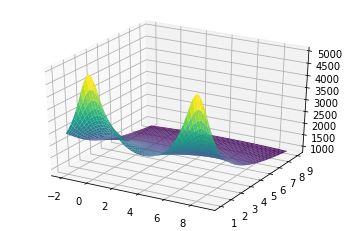

In [5]:
e0 = 8.854e-12
q1 = 5e-9
q2 = 5e-9
x, y = symbols('x y')
P1 = 1 / (4*m.pi*e0)*q1 / sp.sqrt((x/100)**2 + (y/100)**2)
P2 = 1 / (4*m.pi*e0)*q2 / sp.sqrt(((x/100)-0.08)**2 + (y/100)**2)
P = P1 + P2
plot3d(P,(x,-2,9),(y,1,9))

In [6]:
def phi(X,Y):
    expr=P.subs(x,X).subs(y,Y)
    print('Electrical Potential in V =', expr.evalf(4))

interact(phi, X = widgets.IntSlider(min=-2, max=10, step=1, value=4),
              Y = widgets.IntSlider(min=-2, max=10, step=1, value=0))

interactive(children=(IntSlider(value=4, description='X', max=10, min=-2), IntSlider(value=0, description='Y',…

<function __main__.phi(X, Y)>

## Symbolic computation

**Example: Trajectory of a baseball**  

The motion of a baseball is given by the position vector $\vec{r}\,(t)$:

$\vec{r}\,(t) = \begin{pmatrix} r_x\,(t) \\ r_y\,(t) \end{pmatrix} = \begin{pmatrix} 1,5\,\text{m}+(12\,\text{m/s})\cdot t \\ (16\,\text{m/s})\cdot t-(4,9\,\text{m}/\text{s}^{-2}) \cdot t^2 \end{pmatrix}$


where $r_x\,(t)$ and $r_y\,(t)$ are the $x$- and the $y$-components of the position. 

We want to calculate $\vec{v}\,(t)$ by the derivative of the position vector $\vec{r}\,(t)$.
  
   
**Give it a try**
- Calculate $\vec{a}\,(t)$ by the derivative of the velocity $\vec{v}\,(t)$ by adding two lines of code. In the first line write the command `a = sy.diff(v,t)` and in the next line the command `print(a)`.

In [7]:
g = 9.81
r = sp.S("r")
t = sp.S("t")
r = np.array([1.5 + 12*t, 16*t - 4.9*t**2])
v = sp.diff(r,t)
print(v)

[12, 16 - 9.8*t]


In [8]:
                     #<-place your diff command in the first line
                     #<-place your print command in the second line and press shift+enter

# Visualisation of vector fields
**Example: Electrical Field of two charges**  

We want to visualise the resulting electric field $\vec{E}$ of the charges $q_1$ and $q_2$ in the $x$-$y$-plane. We consider the electrical charges $q_1=+1,0\,\text{nC}$ and $q_2=-1,0\,\text{nC}$, both positioned on the $x$-axis at $x_1=+1,5\,\text{m}$ and $x_2=-1,5\,\text{m}$.

The electric field can be calculated by:   
$\vec{E}= \sum_{i}^{} \frac{1}{4\pi\epsilon_0}\,\frac{q_i}{r_i^2} \, \hat{r_i}$

where $\epsilon_0$ is the vacuum permittivity, $q_i$ are the charges, $r_i$ are the distance between the charges and $\hat{r_i}$ are the unit vectors. The unit vector pointing from $q_1$ to $q_2$ is defined by:

$\hat{r_i}=\frac{\vec{r_{12}}}{|\vec{r_{12}}|}$


**Give it a try**
- Change the the value of charge $q_1$ (variable `q1`) from $q_1=+1,0\,\text{nC}$ to $q_1=-1,0\,\text{nC}$ and analyse the resulting electric field.

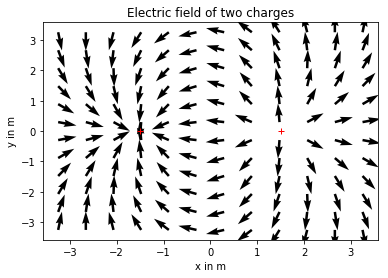

In [9]:
e0 = 8.854e-12
q1 = +1e-9   #<- change the value for q1 here and press shift+enter
q2 = -1e-9
rx = np.linspace(-3.25,3.25,12);
ry = rx;
fig, ax = plt.subplots()

for i in range (0,12):
    for j in range (0,12):
        r1 = ([rx[i] - 1.5, ry[j]])
        E1 = 1/(4*m.pi*e0)*q1*(r1/np.linalg.norm(r1)**3)
        r2 = ([rx[i] + 1.5, ry[j]])
        E2 = 1/(4*m.pi*e0)*q2*(r2/np.linalg.norm(r2)**3)
        E = E1 + E2
        ax.quiver(rx[i], ry[j], E[0], E[1])
        
ax.set_xlabel('x in m')
ax.set_ylabel('y in m')
ax.set_title('Electric field of two charges')
ax.plot(-1.5,0,'-+r')
ax.plot(1.5,0,'-+r')

## Acknowledgment
This work is part of the program digitalization in higher education 2019 of the Donors' association for the promotion of humanities and sciences in Germany and the Ministry of Culture and Science of North Rhine-Westphalia and is licensed under a [Creative Commons Attribution-ShareAlike 4.0 International License (CC BY-SA 4.0)](https://creativecommons.org/licenses/by-sa/4.0/). 
    
<img align="left" src="https://licensebuttons.net/l/by-sa/3.0/88x31.png">

## References
Tipler, Paul A. and Mosca, Gene. Kersten, Peter and Wagner, Jenny (Eds.). _Physik für Studierende der Naturwissenschaften und Technik_. Springer-Verlag, 2019.